# **Padding, Stride, Pooling, Activation**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

import pathlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import PIL
from PIL import Image, ImageOps
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D

sns.set_context('notebook')
sns.set_style('white')

In [14]:
def sobel(img, strides, padding, activation=None):
    
    input_layer = layers.Input(shape=(img.shape[1], img.shape[2], img.shape[3]))

    v_conv = layers.Conv2D(filters=1,
                       kernel_size=3,
                       kernel_initializer=v_grad,
                       strides=strides,
                       padding=padding,
                       activation=None)
    h_conv = layers.Conv2D(filters=1, 
                   kernel_size=3,
                   kernel_initializer=h_grad,
                   strides=strides,
                   padding=padding,
                   activation=None)
    
    v_model = keras.Sequential([input_layer, v_conv])
    h_model = keras.Sequential([input_layer, h_conv])    
    
    # Predict with the models
    Gx = h_model.predict(img)
    Gy = v_model.predict(img)
    G = np.sqrt(np.add(np.multiply(Gx, Gx), np.multiply(Gy, Gy)))
    
    return G

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), padding='same', input_shape=(10, 10, 1)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 10, 10, 1)           │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3,3), strides=(2, 2), padding='same', input_shape=(3, 3, 1)))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 1)             │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
input_ = np.array([[1, 1, 3],
              [2, 1, 2],
              [3, 1, 4]]).reshape(1, 3, 3, 1)

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]]).reshape(3, 3, 1, 1) # reshaping the kernel is important
b = np.array([0.0])
model.set_weights([kernel, b])
output_ = model.predict(input_)
for r in range(output_.shape[1]):
    print([output_[0,r,c,0] for c in range(output_.shape[2])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
[-2.0, 2.0]
[-2.0, 2.0]


### Example 1: Image Processing - Edge Detection

In the last image convolution lab, you learnt about the Sobel Operator which uses two kernels to convolve with an image to perform edge detection. In this example, we will use the Sobel Operator to detect edges in the image of the [Leaning Tower of Pisa](https://pxhere.com/en/photo/1027167?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01) with padding and stride.


In [8]:
# Lets define our custom kernels for the horizontal and vertical gradients
def v_grad(shape, dtype=None):
    # Here we use a single numpy array to define our x gradient kernel
    grad = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]).reshape((3, 3, 1, 1))
    # this line is quite important, we are saying we want one 3x3 kernel each for one channel of pixels (grayscale)
    
    # We check to make sure the shape of our kernel is the correct shape
    # according to the initialization of the Convolutional layer below
    assert grad.shape == shape
    return keras.backend.variable(grad, dtype='float32')

def h_grad(shape, dtype=None):
    grad = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
        ]).reshape((3, 3, 1, 1))
    
    assert grad.shape == shape
    return keras.backend.variable(grad, dtype='float32')

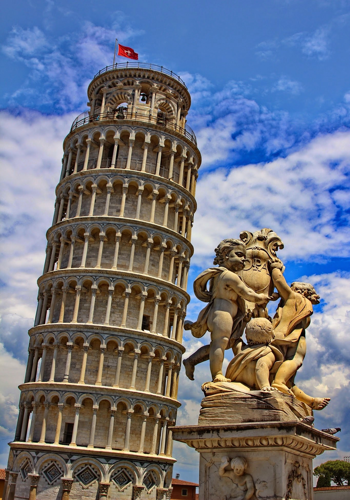

In [11]:
img_width = 350
img_height = 500
img = PIL.Image.open('pisa.jpg').resize((img_width, img_height))
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


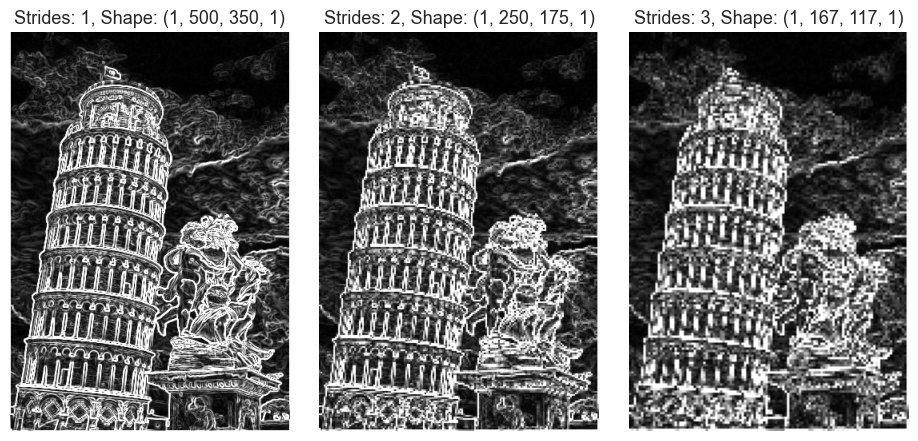

In [15]:
input_img = ImageOps.grayscale(img)
input_img = np.array(input_img).reshape((1, img_height, img_width, 1))

fig, axs = plt.subplots(1, 3, figsize=(9, 10), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0.1)

for i, ax in enumerate(axs.flat):
    output = sobel(img = input_img, 
                   padding='same',
                   strides=i+1).astype('int').clip(0,255)

    ax.imshow(output.reshape(output.shape[1], output.shape[2]), cmap='gray')  # Reshape as imshow expects 2D image
    ax.set_title(f"Strides: {i+1}, Shape: {output.shape}", fontsize=13)
    ax.axis('off')

plt.show()

Text(0, 0.5, 'Sigmoid(x)')

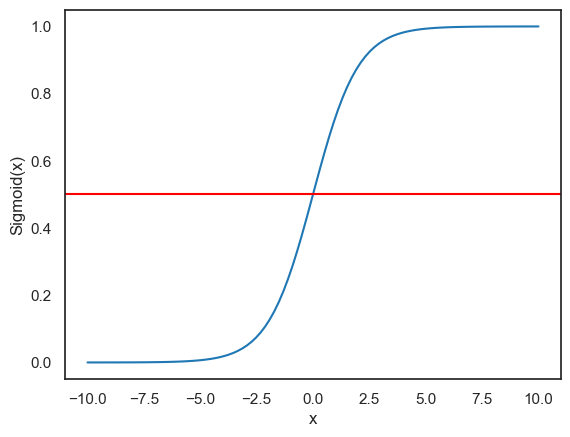

In [16]:
def sigmoid(X):

    return 1/(1 + np.exp(-X))

X = np.linspace(-10, 10, 100)
sigmoid_X = sigmoid(X)
plt.plot(X, sigmoid_X)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")

Text(0, 0.5, 'Relu(x)')

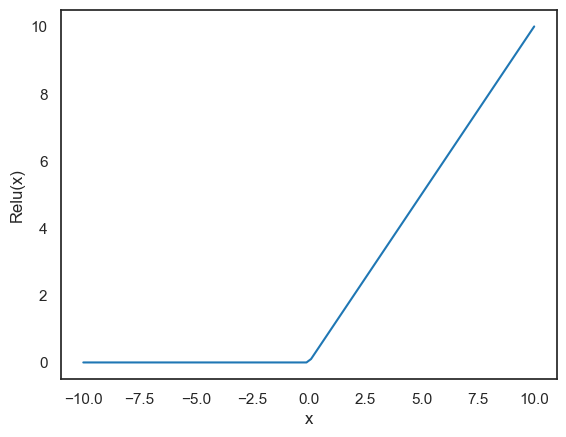

In [17]:
def relu(X):
    return np.maximum(0, X)

X = np.linspace(-10, 10, 100)
relu_X = relu(X)
plt.plot(X, relu_X)
plt.xlabel("x")
plt.ylabel("Relu(x)")

### Example 2: Feature Detection with Kernel and Activation

In this example, instead of using the Sobel operator for edge detection, we will convolve a simple kernel over all three channels of a RGB image for the same purpose. This means our final result of edge detection will no longer be a boring, grayscale image, but a colorful and exciting one!

Specifically, we will use the following kernel:

$$
	\begin{bmatrix} 
	-1 & -1 & -1 \\\\\\
	-1 & 8 & -1\\\\\\
	-1 & -1 & -1\\\\\\
	\end{bmatrix}
	\quad
$$

Note that the kernel we will be using contains negative values, therefore we should specify an activation function (namely **ReLu**) in our Conv2D layer to filter out the negative values.

Let's download the image first!


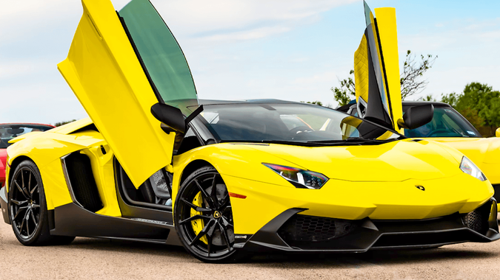

In [18]:
img_width = 500
img_height = 280
img = Image.open('lambor.jpeg').resize((img_width, img_height))
img

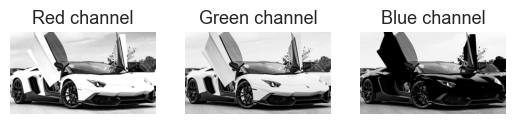

In [19]:
arr = np.array(img)
red_c = arr[:,:,0]
green_c = arr[:,:,1]
blue_c = arr[:,:,2]

channels = [red_c, green_c, blue_c]
names = ['Red', 'Green', 'Blue']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(channels[i], cmap='gray')
    plt.axis('off')
    plt.title(f"{names[i]} channel", fontsize=13)

In [21]:
kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]]).reshape(3,3,1,1)
b = np.array([0.0])

model = keras.Sequential()
model.add(layers.Conv2D(input_shape = (img_height, img_width, 1),
                 filters=1, 
                 kernel_size=3, 
                 padding='same',
                 activation='relu'
                 ))
model.set_weights([kernel, b])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 280, 500, 1)         │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


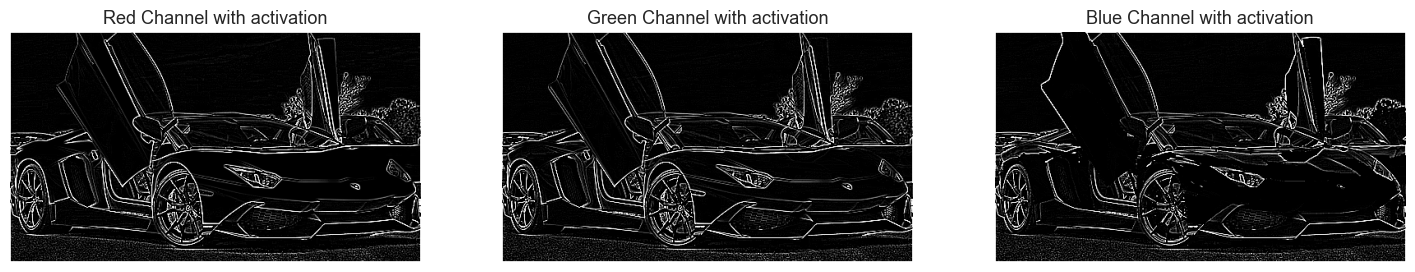

In [22]:
acts = []
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    
    # loop through each channel
    input_ = channels[i].reshape((1, img_height, img_width, 1)) 
    act = model.predict(input_).squeeze(0).squeeze(2).astype('int').clip(0,255)
    # store the result in a list called "acts"
    acts.append(act)
    
    plt.imshow(act, cmap='gray')
    plt.axis("off")
    plt.title(f"{names[i]} Channel with activation", fontsize=13)

(-0.5, 499.5, 279.5, -0.5)

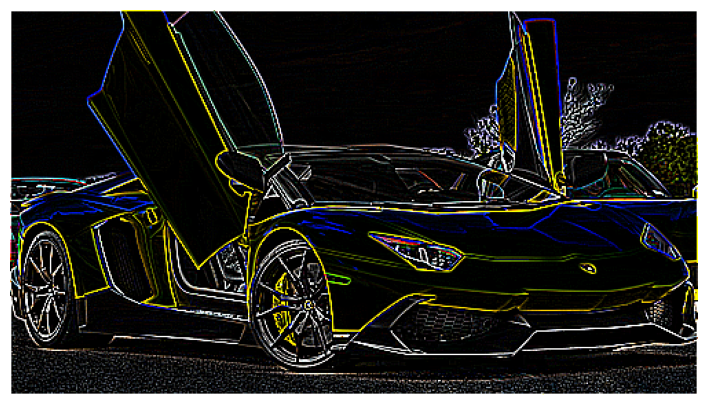

In [23]:
arr_hat = np.dstack((acts[0],acts[1],acts[2]))

plt.figure(figsize=(10,5))
plt.imshow(arr_hat)
plt.axis("off")

## Pooling


In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("MNIST downloaded!")
print("Train set shape:", X_train.shape)

MNIST downloaded!
Train set shape: (60000, 28, 28)


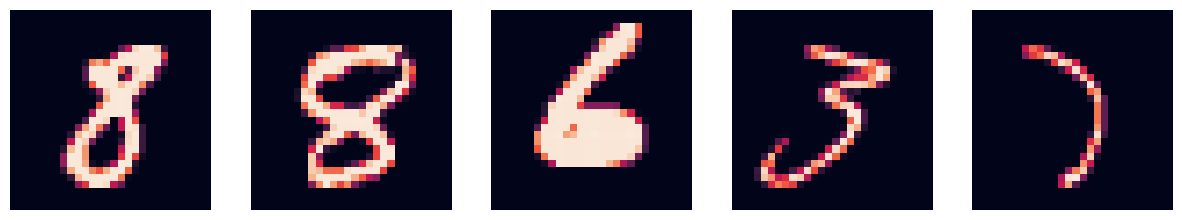

In [27]:
images = []
plt.figure(figsize=(15,3))
for i in range(5):
    img = X_train[np.random.randint(0, 60000)].astype('float')
    images.append(img)
    
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


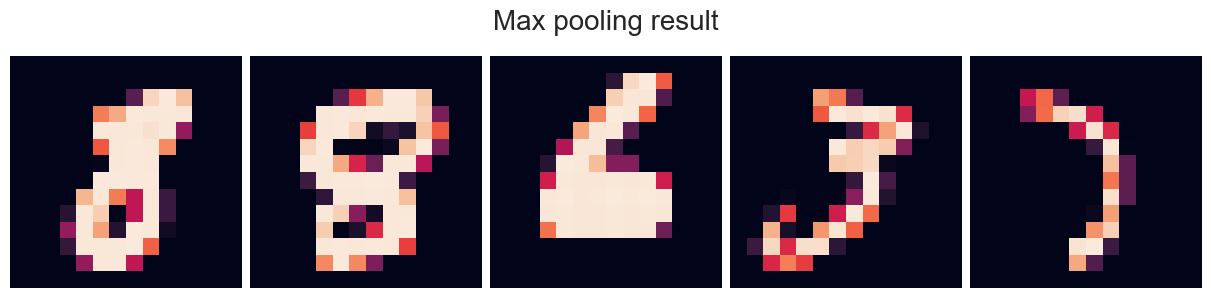

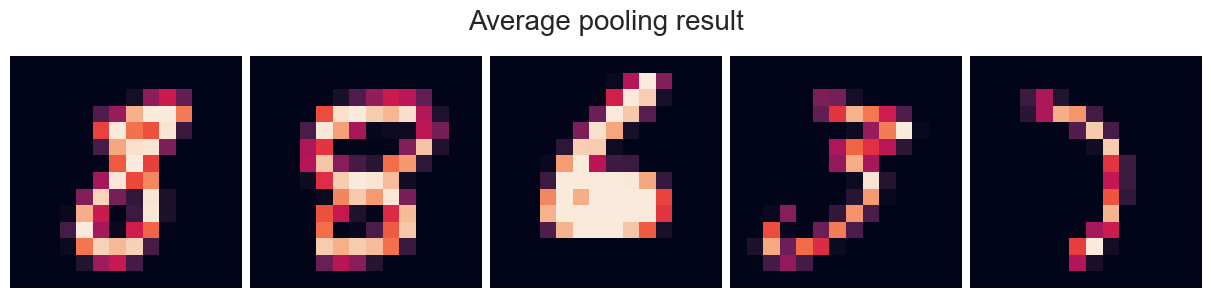

In [28]:
max_pool = keras.Sequential([MaxPooling2D(pool_size = (2,2))])
avg_pool = keras.Sequential([AveragePooling2D(pool_size = (2,2))])

fig1, axs1 = plt.subplots(1, 5, figsize=(12,3), constrained_layout=True)
fig2, axs2 = plt.subplots(1, 5, figsize=(12,3), constrained_layout=True)
fig1.suptitle("Max pooling result", fontsize=20)
fig2.suptitle("Average pooling result", fontsize=20)

for img, ax1, ax2 in zip(images, axs1.flat, axs2.flat):
    input_ = img.reshape(1, 28, 28, 1)
    ax1.imshow(max_pool.predict(input_).squeeze(0).squeeze(2))
    ax1.axis('off')
    ax2.imshow(avg_pool.predict(input_).squeeze(0).squeeze(2))
    ax2.axis('off')


## Exercises

In this exercise, you will support building a CNN to classify images from the famous CIFAR10 dataset.

The pre-defined **load_cifar10** function will return a preprocessed cifar10 dataset, where:

1. The pixel values in **X_train** and **X_test** are normalized float numbers.
2. The **y_train** and **y_test** are one-hot encoded into 10-element binary vectors with a 1 for the index of the class value.


In [31]:
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential
def load_cifar10():
    (trainX, trainY), (testX, testY) = datasets.cifar10.load_data()

    trainX = trainX.astype('float')/255
    testX = testX.astype('float')/255

    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY

In [32]:
X_train, y_train, X_test, y_test = load_cifar10()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### Exercise 1 - Display some images

Write the code to display the first 25 images from the train set.


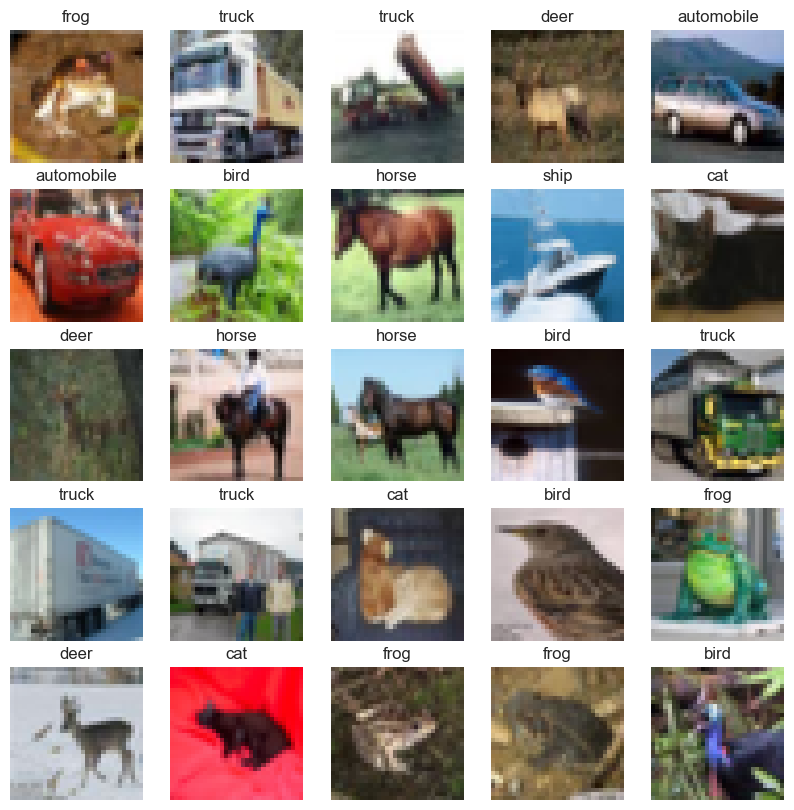

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.where(y_train[i]==1)[0][0]])
    plt.axis("off")

### Exercise 2 - Set up a Convolution layer

Create a Conv2D layer called **Conv** with 
- 32 $3\times3$ kernels
- `'he_uniform'` kernel initializer
- Padding
- ReLu activation


In [35]:
conv = layers.Conv2D(filters=(32), kernel_size=(3,3), kernel_initializer='he_uniform', padding='same', activation='relu')

### Exercise 3 - Set up a Max pooling layer

Create a MaxPooling2D layer with pool_size equal 2, name the single layer **Max**.


In [36]:
Max = layers.MaxPooling2D(pool_size=(2, 2))

### Exercise 4 - Create a deeper CNN with blocks

Now that you've practiced defining the two types of most commonly used layers in CNN. You can stack two **Conv** layers and one **Max** layer together as a block, and create a deeper CNN with three of those blocks!

You could choose to double the number of kernels/channels in the **Conv2D** layers as you move from one block to another.


In [37]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2, 2))

In [38]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)